### Import libraries

In [2]:
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import allantools

from andbro__get_data_archive import __get_data_archive
from andbro__querrySeismoData import __querrySeismoData
from scipy import signal

### Define parameters

In [3]:
seed_id = 'BW.ROMY.10.BJZ'
seed_id = 'GR.FUR..BHZ'

starttime  = obs.UTCDateTime("2018-05-14 00:00")
endtime    = obs.UTCDateTime("2018-05-14 23:59")

## define tau range e.g. 5 (= 10⁵) and number of samples N
upper = 5
lower = -3
N = 50


### Load data

In [30]:
## --- online
# st, inv = __querrySeismoData(seed_id, starttime, endtime, True, None)

## --- archive
# st, inv = __get_data_archive(seed_id, starttime, endtime, raw=False)

## --- local 
st = obs.read("/home/andbro/notebooks/data/DROMY_FJU_2019-05-14_raw.mseed")
# st = obs.read("/home/andbro/notebooks/data/ROMY_BJU_2019-05-14.mseed")


In [26]:
duration = st[0].stats.npts*st[0].stats.delta
sta = st[0].stats.station
cha = st[0].stats.channel

In [27]:
# restitute=True

# if restitute:

#     pre_filter = (0.01, 0.05, 20, 40)

#     out="VEL"  # "DISP" "ACC"

#     st.remove_response(
#         inventory=inv, 
#         pre_filt=pre_filter,
#         output=out,
#     )
#     print(f"response function removed! output = {out}")


### Calculation

In [32]:

freqs1, psd1 = signal.welch(st[0].data*1e-6, fs=1/st[0].stats.delta)
freqs2, psd2 = signal.welch(st[0].data*1e-6, fs=1/st[0].stats.delta, nfft=5000, nperseg=5000)

# from andbro__fft import __fft
# asd, freqs2 = __fft(st[0].data, st[0].stats.delta, window=None, normalize=None)


### Plotting

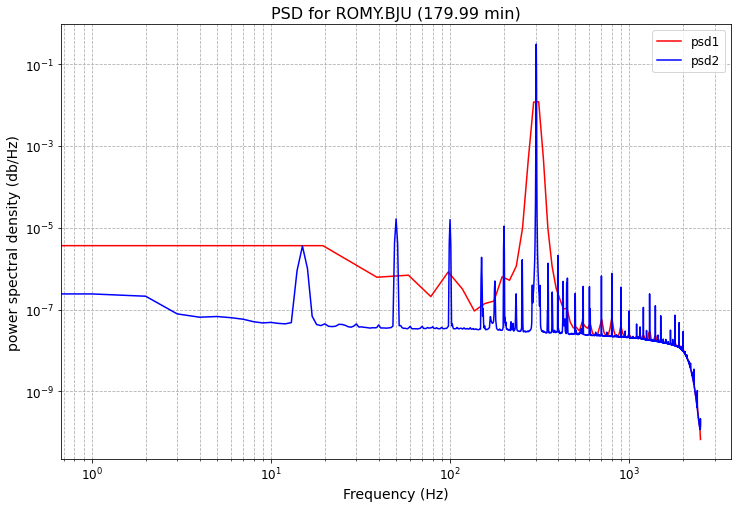

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

font = 14

# ax.scatter(freqs1, psd1, color='r')
ax.plot(freqs1, psd1, color='r', label="psd1")

ax.plot(freqs2, psd2, color='b', label="psd2")


# # ax.scatter(freqs2, asd, color='g')
# ax.plot(freqs2, asd**2, color='g', label="psd")

ax.set_title(f"PSD for {sta}.{cha} ({round(duration/60,2)} min)", fontsize=font+2)
ax.set_xlabel("Frequency (Hz)", fontsize=font)
ax.set_ylabel("power spectral density (db/Hz)", fontsize=font)

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(fontsize=font-2)

ax.grid(True, which="both", ls="--")

ax.tick_params(labelsize=font-2)

# ax.set_xlim(1e-1, 3e3)

plt.show();